# MD maps without CSF - threshold 0.5 - Centiloids


In [11]:
%run /home/grg/git/alfa/nilearn-helper.py
import sys
import pandas as pd
sys.path.append('/home/grg/git/alfa/')
import multireg_spm12 as mreg
reload(mreg)
%matplotlib inline

In [12]:
excel_fp = '/home/grg/SPM/2018/amylstaging_MD_wo_csf5_centiloids.xls'

analysis_name, ext = osp.splitext(osp.split(excel_fp)[1])
paramtype = analysis_name.split('_')[1]
analysis_wd = osp.join(osp.dirname(excel_fp), analysis_name)
spm = glob(osp.join(analysis_wd, 'estimatecontrasts/SPM.mat'))
#aal_fp = '/usr/local/MATLAB/R2014a/toolbox/spm12/toolbox/aal/ROI_MNI_V5.nii'
mask_fp = '/home/grg/spm/MNI_T1_brain_wo_csf.nii'
print 'Found SPM files:', spm
pd.read_excel(excel_fp).head()

Found SPM files: ['/home/grg/SPM/2018/amylstaging_MD_wo_csf5_centiloids/estimatecontrasts/SPM.mat']


images        age  gender  apoe  \
0  /home/grg/data/AmylStaging/dartel_final/spm/MD...  63.422313       2     0   
1  /home/grg/data/AmylStaging/dartel_final/spm/MD...  54.757016       1     0   
2  /home/grg/data/AmylStaging/dartel_final/spm/MD...  50.390144       2     2   
3  /home/grg/data/AmylStaging/dartel_final/spm/MD...  54.151951       1     0   
4  /home/grg/data/AmylStaging/dartel_final/spm/MD...  52.878850       1     0   

   centiloids  
0       -7.62  
1       -1.84  
2       -0.16  
3       -4.12  
4      -17.65

In [13]:
print 'Reading', excel_fp, 'looking up column', paramtype, '...'
a = mreg.generic_version(excel_fp, analysis_wd, mask_fp, analysis_name)
n1 = a.get_node('modeldesign')
n3 = a.get_node('estimatecontrasts')
print '# of scans included in the analysis:', len(n1.inputs.in_files)
display_html(pd.DataFrame([e for e in n3.inputs.contrasts], 
             columns=['contrast name', 'contrast type', 'covariate names', 'covariate weights']))

Reading /home/grg/SPM/2018/amylstaging_MD_wo_csf5_centiloids.xls looking up column MD ...
Analysis name: amylstaging_MD_wo_csf5_centiloids
First column: images
Columns in the model: [u'age', u'gender', u'apoe', u'centiloids']
Effect of Centiloids
Effect of Gender
Effect of Linear age
Analysis name: amylstaging_MD_wo_csf5_centiloids
Scans (107): [u'/home/grg/data/AmylStaging/dartel_final/spm/MD_wo_csf.5/10019_MD_wo_csf_s.nii', u'/home/grg/data/AmylStaging/dartel_final/spm/MD_wo_csf.5/10044_MD_wo_csf_s.nii', u'/home/grg/data/AmylStaging/dartel_final/spm/MD_wo_csf.5/10065_MD_wo_csf_s.nii', u'/home/grg/data/AmylStaging/dartel_final/spm/MD_wo_csf.5/10070_MD_wo_csf_s.nii', u'/home/grg/data/AmylStaging/dartel_final/spm/MD_wo_csf.5/10137_MD_wo_csf_s.nii', u'/home/grg/data/AmylStaging/dartel_final/spm/MD_wo_csf.5/10162_MD_wo_csf_s.nii', u'/home/grg/data/AmylStaging/dartel_final/spm/MD_wo_csf.5/10200_MD_wo_csf_s.nii', u'/home/grg/data/AmylStaging/dartel_final/spm/MD_wo_csf.5/10225_MD_wo_csf_s.ni

contrast name 
 contrast type 
 covariate names 
 covariate weights 
 
 
 
 
 0 
 Effect Centiloids 
 T 
 [centiloids] 
 [1.0] 
 
 
 1 
 Effect Gender 
 T 
 [gender] 
 [1.0] 
 
 
 2 
 Effect Linear age 
 T 
 [age] 
 [1.0]

/home/grg/SPM/2018/amylstaging_MD_wo_csf5_centiloids/estimatecontrasts/spmT_0001.nii T
Saving to... /tmp/tmpIBakqg.png
/home/grg/SPM/2018/amylstaging_MD_wo_csf5_centiloids/estimatecontrasts/spmT_0002.nii T
Saving to... /tmp/tmpKDY6EQ.png
/home/grg/SPM/2018/amylstaging_MD_wo_csf5_centiloids/estimatecontrasts/spmT_0003.nii T
Saving to... /tmp/tmpuYmldr.png


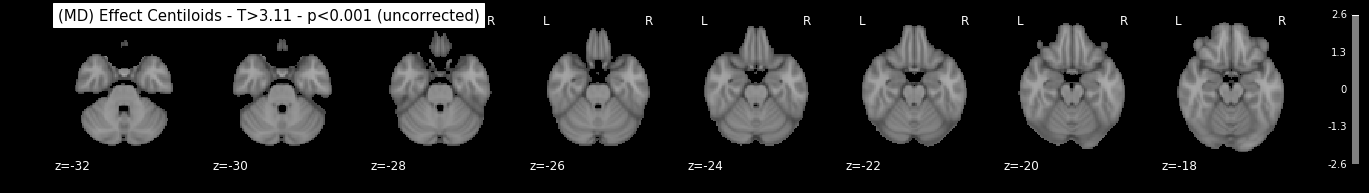

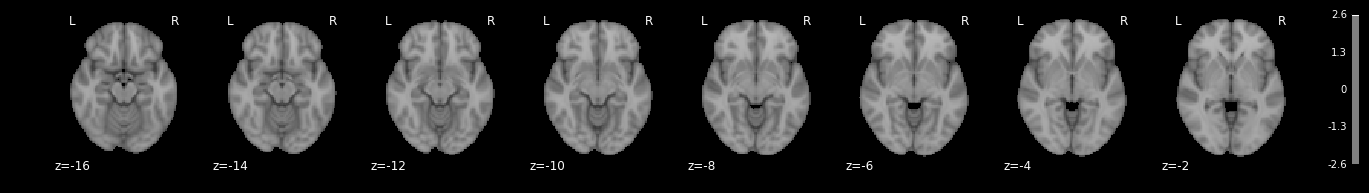

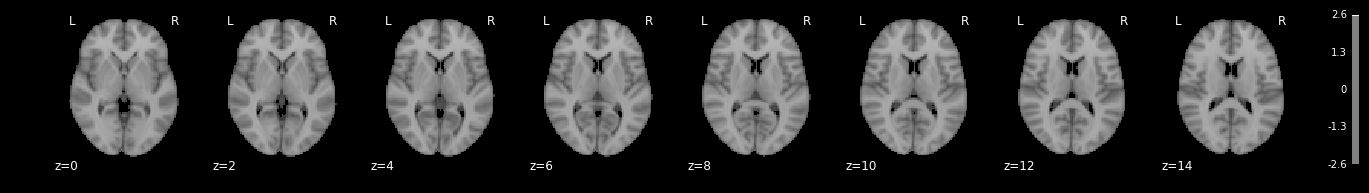

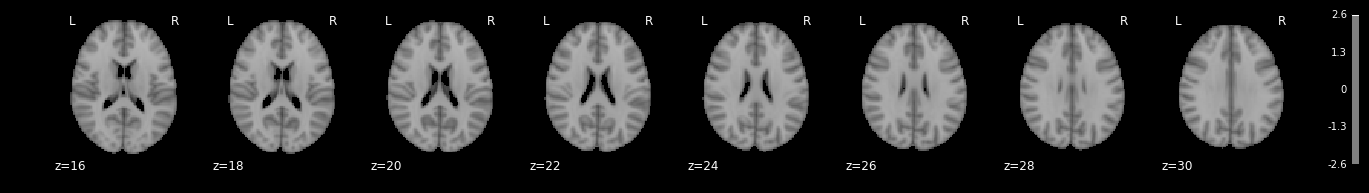

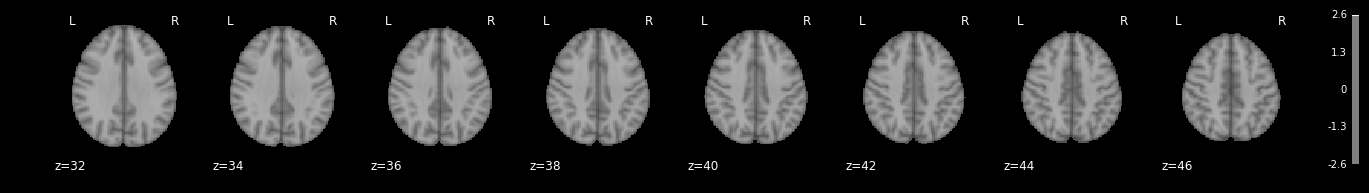

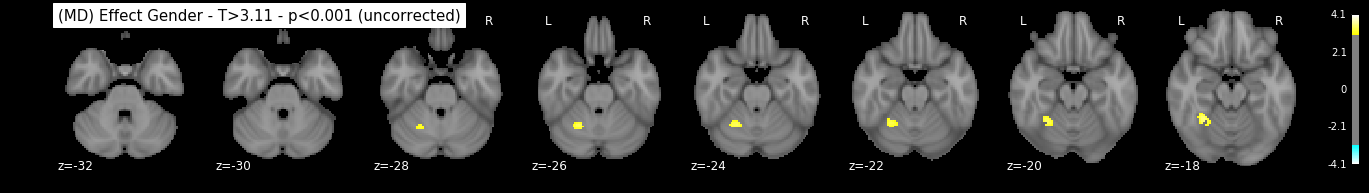

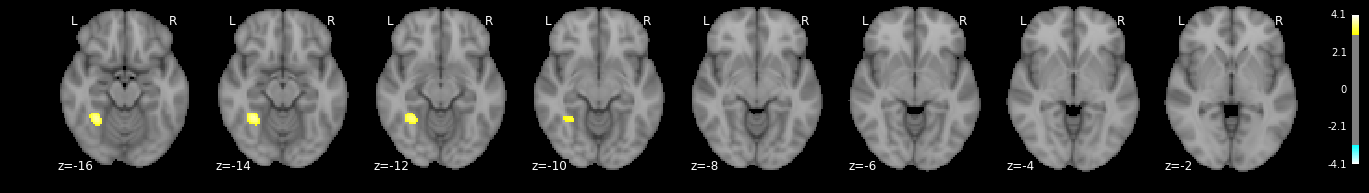

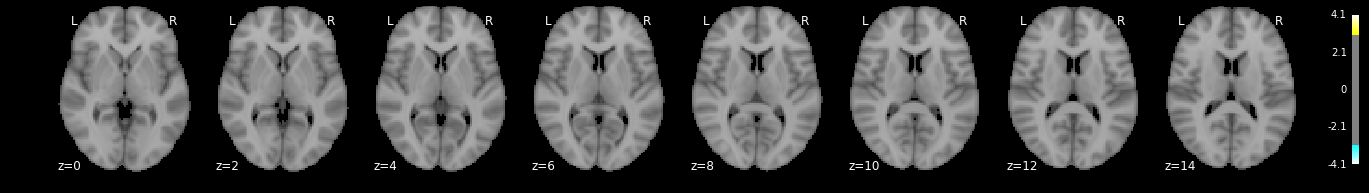

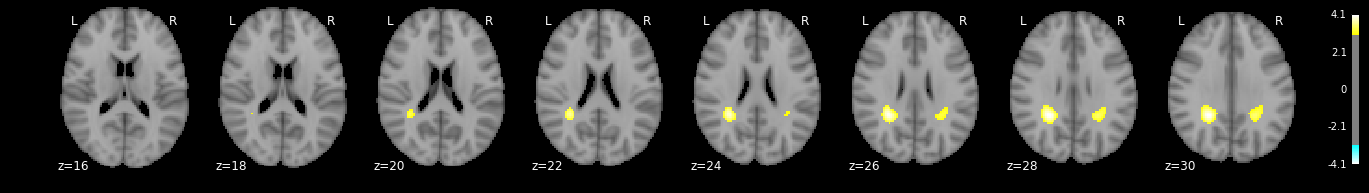

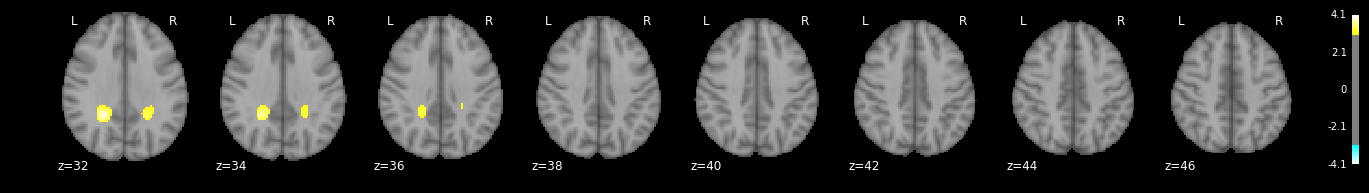

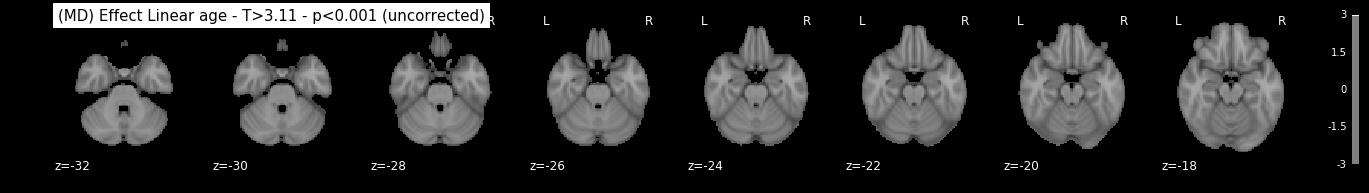

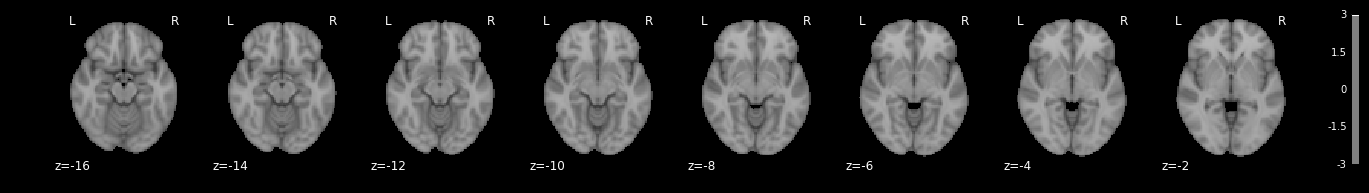

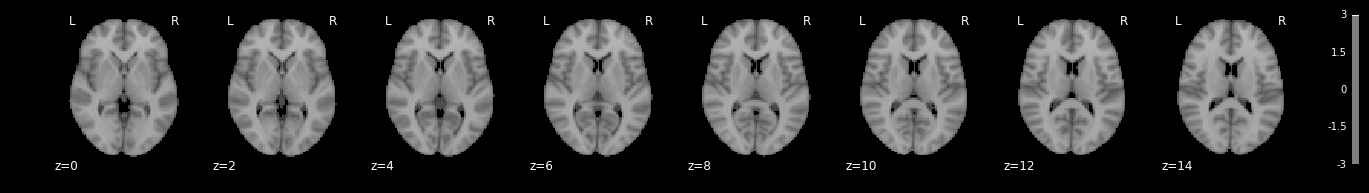

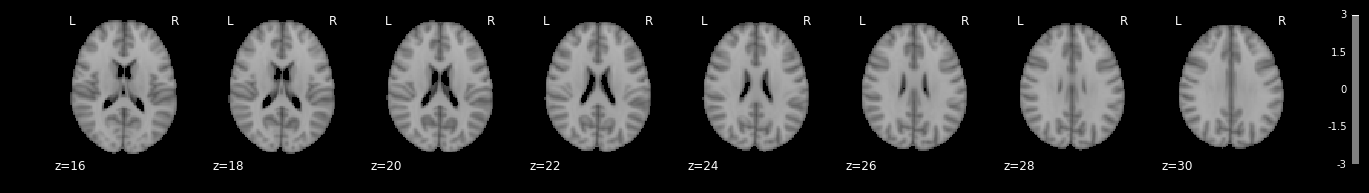

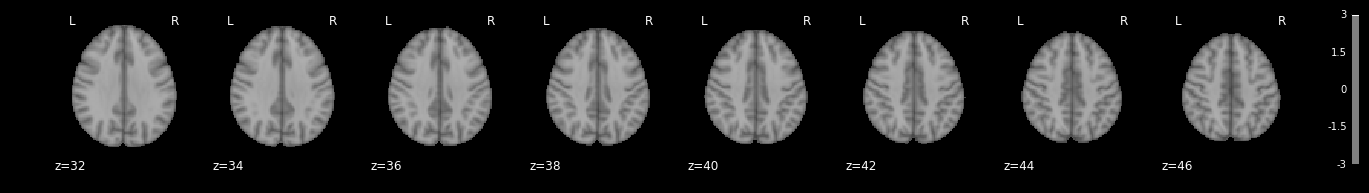

In [14]:
sections = sections_allcontrasts(analysis_wd, paramtype, axis='z', mode='uncorrected')

In [15]:
spm_mat_file = '/tmp/analysis_amylstaging/ALFA_data_staging/estimatecontrasts/SPM.mat'
out = pyAAL.pyAAL(spm_mat_file, 2, k=10, mode=2)
pyAAL.to_dataframe(out)

AssertionError: 